# SVD: Photo Compression

#### *variationalform* <https://variationalform.github.io/>

#### *Just Enough: progress at pace*

<https://variationalform.github.io/>

<https://github.com/variationalform>

<https://www.brunel.ac.uk/people/simon-shaw>.

<table>
<tr>
<td>
<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" style="height:18px"/>
</td>
<td>

<p>
This work is licensed under CC BY-SA 4.0 (Attribution-ShareAlike 4.0 International)

<p>
Visit <a href="http://creativecommons.org/licenses/by-sa/4.0/">http://creativecommons.org/licenses/by-sa/4.0/</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

# Formulae

For $\boldsymbol{B}\in\mathbb{R}^{m\times n}$

$$
\boldsymbol{B} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
=\sum_{j=1}^{p} \sigma_j \boldsymbol{u}_j\boldsymbol{v}_j^T
$$

where: $\boldsymbol{U}\in\mathbb{R}^{m\times m}$,
$\boldsymbol{\Sigma}\in\mathbb{R}^{m\times n}$, $\boldsymbol{V}\in\mathbb{R}^{n\times n}$
and $p=\min\{m,n\}$. Note that $\boldsymbol{\Sigma}=\text{diag}(\sigma_1,\ldots,\sigma_p)$
and we can always arrange this so that $0 \le \sigma_1\le\cdots\le\sigma_p$.

$\boldsymbol{B}$ is real here, then $\boldsymbol{U}$ and $\boldsymbol{V}$
are real and *orthogonal*.

If $\sigma_r\ne 0$ and $\sigma_p= 0$ for all $p>r$ then
$r$ is the rank of $\boldsymbol{B}$.

Note storage for $\boldsymbol{B}$ is $mn$. That for the SVD is 
$r(m+n+1)$. The ratio is

$$
\frac{r(m+n+1)}{mn} 
= \frac{r}{n}
+ \frac{r}{m} 
+ \frac{r}{mn} 
$$

**BEWARE** that python indices start at zero. 

## The Thin SVD

Here we still have $\boldsymbol{B}\in\mathbb{R}^{m\times n}$ but with

$$
\boldsymbol{B} = \boldsymbol{U}_1\boldsymbol{\Sigma}_1\boldsymbol{V}^T
=\sum_{j=1}^{n} \sigma_j \boldsymbol{u}_j\boldsymbol{v}_j^T
$$

where: $\boldsymbol{U}_1\in\mathbb{R}^{m\times n}$,
$\boldsymbol{\Sigma}_1\in\mathbb{R}^{n\times n}$. This is called the *thin SVD*.


Standard imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
%matplotlib inline

#from sklearn import datasets, linear_model
#from sklearn.metrics import mean_squared_error, r2_score

Main reference:
<https://cmdlinetips.com/2020/01/image-reconstruction-using-singular-value-decomposition-svd-in-python/>
21 September 2022

In [2]:
# load in the FFC bear (low resolution) and visually check it.
img = Image.open('gfx/ffc_lores.jpg')
#img = Image.open('tasty_lores.jpg')

In [3]:
# ignore this
newlist = [i for i in range(1,4)]
print(newlist)

[1, 2, 3]


From <https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook> and <https://medium.com/the-researchers-guide/adding-image-files-inside-an-ipython-notebook-python-and-r-2ba089a658b8>
    

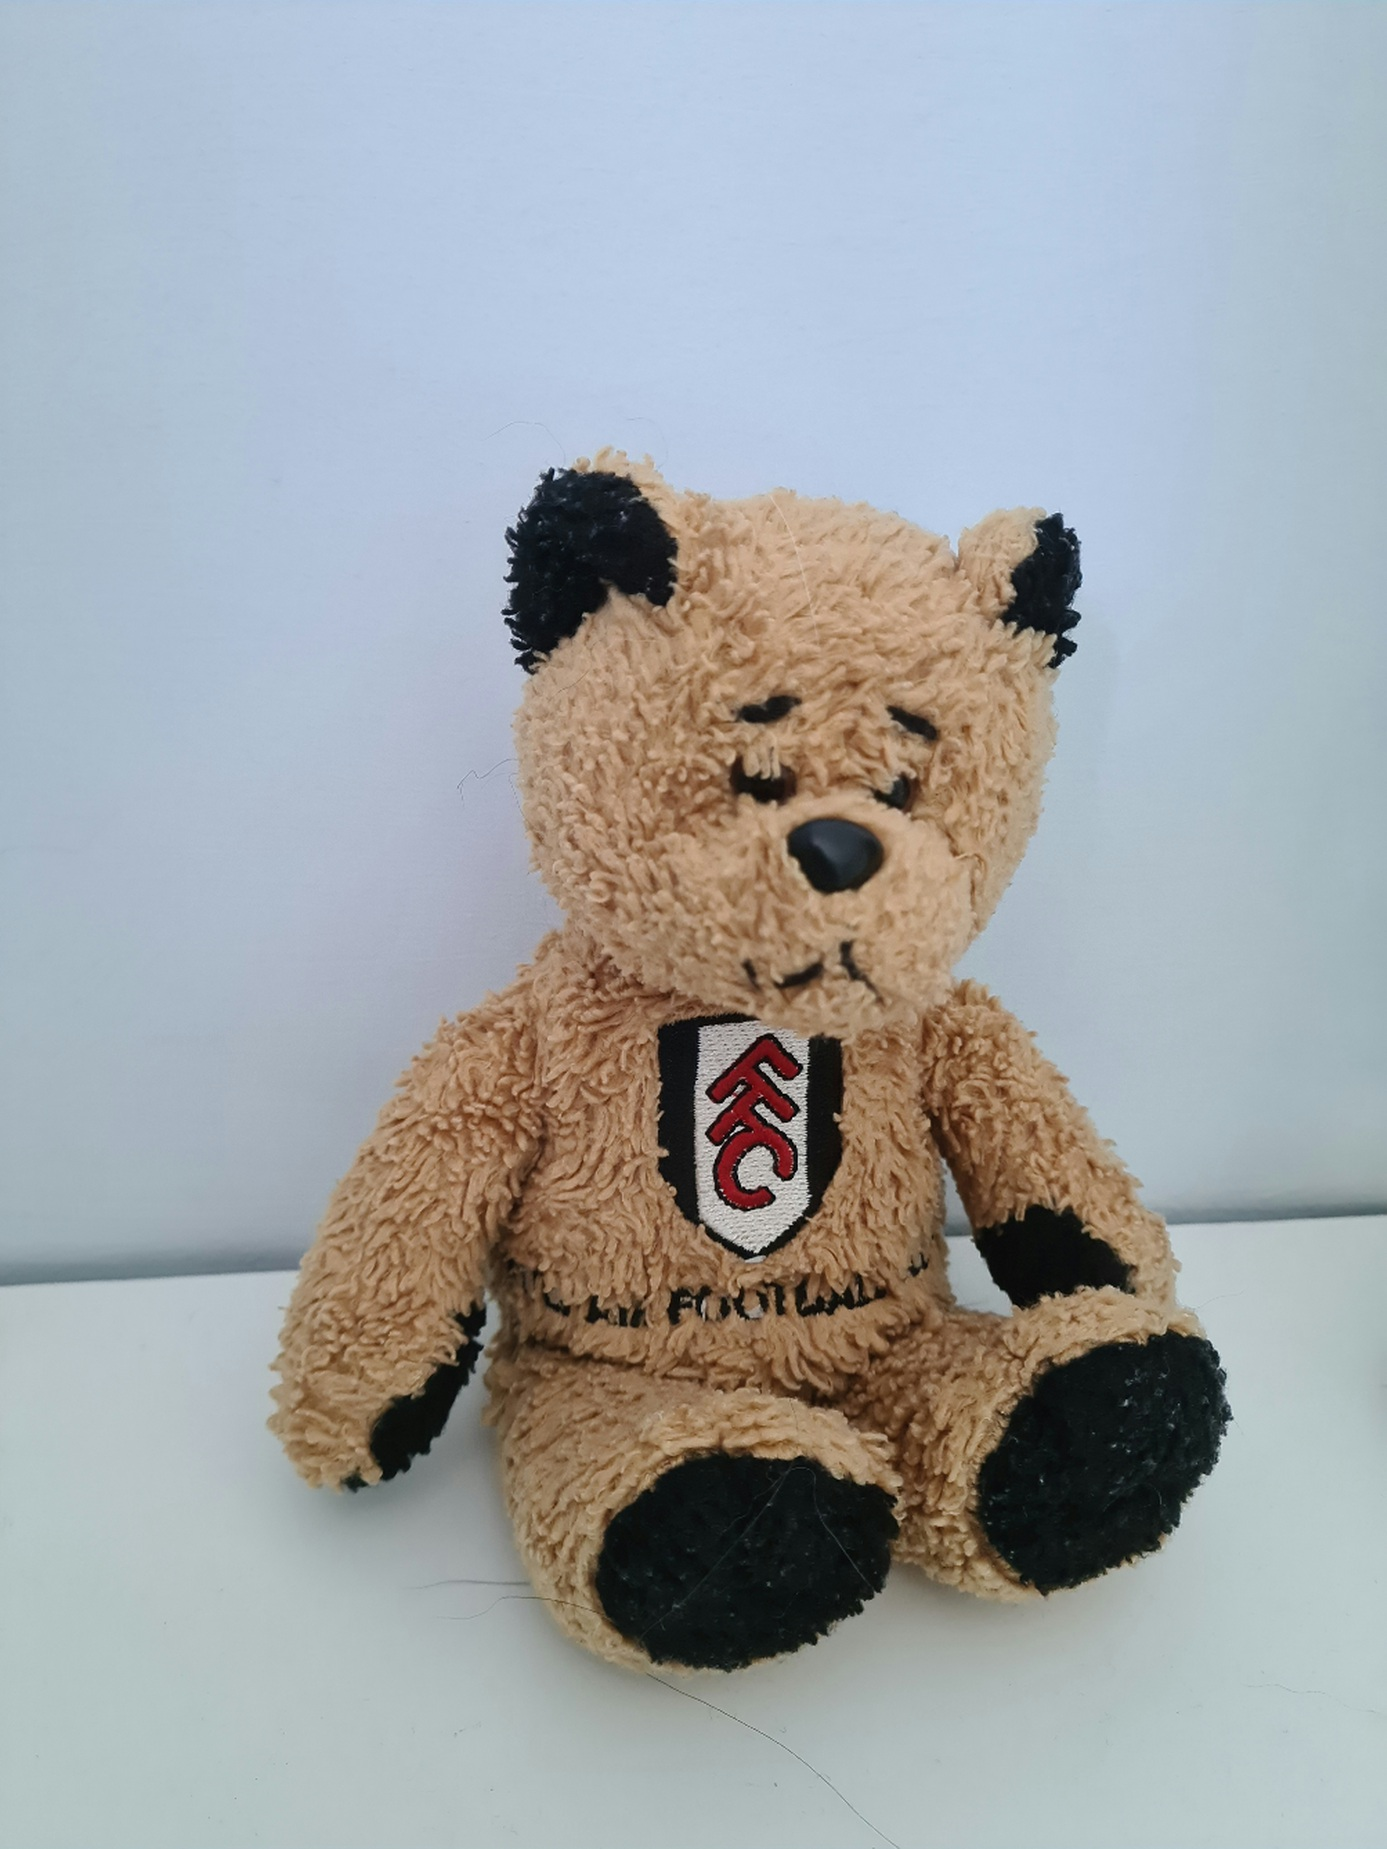

In [4]:
# This...
#from IPython.display import Image
#Image(filename='ffc_lores.jpg', width = 150) 
# will clash with Image from PIL above

# so do this instead...
import IPython.display
IPython.display.Image(filename='gfx/ffc_lores.jpg', width = 150) 
#IPython.display.Image(filename='gfx/tasty_lores.jpg', width = 150) 

From <https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.fromarray>

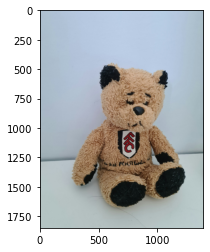

In [5]:
im = Image.open("gfx/ffc_lores.jpg")
a = np.asarray(im)
im = Image.fromarray(a)
plt.imshow(im)

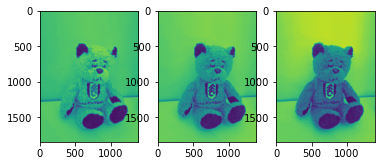

In [6]:
# convert band 'bnd' to a numpy array and show it
for bnd in range(3):
  plt.subplot(1, 3, 1+bnd)
  img_mat = np.array(list(img.getdata(bnd)), float) 
  img_mat = np.matrix(img_mat)
  img_mat.shape = (img.size[1], img.size[0])
  plt.imshow(img_mat)


In [7]:
# get red, blue and green bands
rband =img.getdata(band=0)
gband =img.getdata(band=1)
bband =img.getdata(band=2)

# convert to numpy arrays 
imgr_mat = np.array(list(rband), float) 
imgg_mat = np.array(list(gband), float) 
imgb_mat = np.array(list(bband), float)

print('sizes = ', imgr_mat.size, imgg_mat.size, imgb_mat.size)

sizes =  2564563 2564563 2564563


In [8]:
# get image shape - assume they are all the same
imgr_mat.shape = imgg_mat.shape = imgb_mat.shape = (img.size[1], img.size[0])

# convert to 1d-array to matrix
imgr_mat = np.matrix(imgr_mat)
imgg_mat = np.matrix(imgg_mat)
imgb_mat = np.matrix(imgb_mat)

In [9]:
# That chained assignment above might be dangerous...
# https://stackoverflow.com/questions/7601823/how-do-chained-assignments-work
print(imgb_mat.shape is imgg_mat.shape)
# it depends on what is being chained.

False


Let's take a look at them

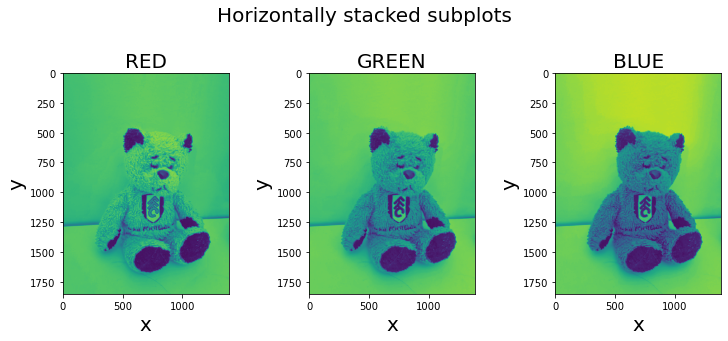

In [10]:
fontsize=20
fig=plt.figure(figsize=(10, 5))
fig.suptitle('Horizontally stacked subplots', fontsize=fontsize)

axs=fig.add_subplot(1,3,1)
axs.imshow(imgr_mat)
axs.set_xlabel('x', fontsize=fontsize)
axs.set_ylabel('y', fontsize=fontsize)
axs.set_title('RED', fontsize=fontsize)

axs=fig.add_subplot(1,3,2)
axs.imshow(imgg_mat)
axs.set_xlabel('x', fontsize=fontsize)
axs.set_ylabel('y', fontsize=fontsize)
axs.set_title('GREEN', fontsize=fontsize)

axs=fig.add_subplot(1,3,3)
axs.imshow(imgb_mat)
axs.set_xlabel('x', fontsize=fontsize)
axs.set_ylabel('y', fontsize=fontsize)
axs.set_title('BLUE', fontsize=fontsize)

# use fractions of fontsize
plt.tight_layout(pad=0.3, w_pad=2.5, h_pad=0.3)
plt.show()

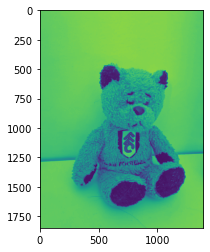

In [11]:
# why doesn't this give back the original image?
plt.imshow(imgr_mat+imgb_mat+imgg_mat)

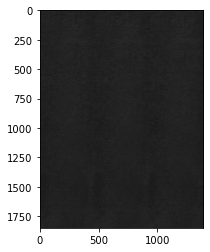

In [12]:
# why doesn't this give back the red band of the original image?
img_temp = Image.fromarray(imgr_mat, 'RGB')
#img.save('my.png')
#img_png.show()
plt.imshow(img_temp)

In [13]:
# center and scale data before applying SVD. This puts each variable in the same scale.
img_mat_scaled= (img_mat-img_mat.mean())/img_mat.std()
# Perform SVD using np.linalg.svd
U, s, V = np.linalg.svd(img_mat_scaled) 


In [14]:
print(U.shape)
print(V.shape)
print(s.shape)
print(s[:50])
# Compute Variance explained by each singular vector
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
print(var_explained[:65])

(1849, 1849)
(1387, 1387)
(1387,)
[1268.41932222  698.36368661  321.06493012  264.20041839  236.79314645
  197.92928097  154.01195524  134.58034556  111.1391668   105.56214697
   93.36037928   86.1604122    83.65620577   78.82762698   73.79828956
   70.61248812   69.22325849   61.31803995   60.08419324   57.96079151
   55.88170526   53.92913361   52.24592105   48.64298238   47.91889479
   45.37512302   44.62332737   42.95284066   41.75802744   41.62443779
   40.27218111   39.7506993    38.78006567   37.30406578   36.68385364
   35.99240321   35.14362719   34.45909062   33.42360382   33.20470669
   32.59909077   32.17356224   31.89590937   31.16646761   30.63781882
   30.30696041   29.4381169    29.25956794   28.59660133   28.22500202]
[0.627 0.19  0.04  0.027 0.022 0.015 0.009 0.007 0.005 0.004 0.003 0.003
 0.003 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.    0.    0.    0.    0.    0.   

## scree plot - how many do we need? 

Again, this is from 
<https://cmdlinetips.com/2020/01/image-reconstruction-using-singular-value-decomposition-svd-in-python>
21 Sept 2022

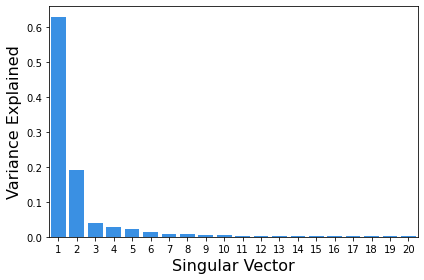

In [15]:
sns.barplot(x=list(range(1,21)),
            y=var_explained[0:20], color="dodgerblue")
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.savefig('svd_scree_plot.png',dpi=150)
#plt.savefig("Line_Plot_with_Pandas_Python.jpg")

## Early Reconstruction Attempt

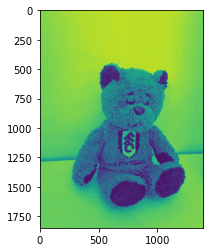

In [16]:
# attempt reconstruction
num_components = 800
reconst_img = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(V[:num_components, :])
plt.imshow(reconst_img)

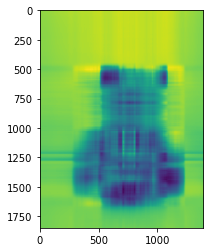

In [17]:
num_components = 5
reconst_img_5 = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(V[:num_components, :])
plt.imshow(reconst_img_5)
#plt.savefig('reconstructed_image_with_5_SVs.png',dpi=150, figsize=(8,6))


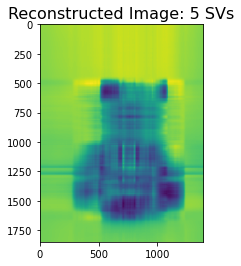

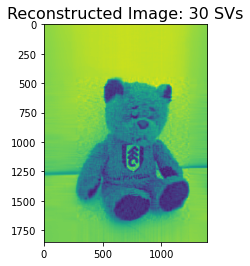

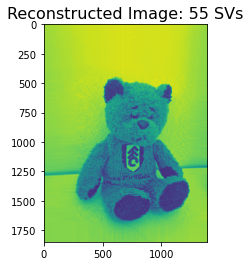

In [18]:
import time
nc = 10
for nc in range(5,65,25):
  reconst_img = np.matrix(U[:, :nc]) * np.diag(s[:nc]) * np.matrix(V[:nc, :])
  plt.imshow(reconst_img)
  plt.title('Reconstructed Image: '+str(nc)+' SVs', size=16)
  plt.pause(1)

#plt.savefig('reconstructed_image_with_xxxxxxxxxx_SVs.png',dpi=150, figsize=(8,6))

In [19]:
# https://stackoverflow.com/questions/10965417/how-to-convert-a-numpy-array-to-pil-image-applying-matplotlib-colormap
from PIL import Image
import numpy as np
#imgrgb.mat
img_all = np.array([imgr_mat, imgg_mat, imgb_mat]).T
img_all = np.swapaxes(img_all,0,1)

#PIL_image = Image.fromarray(np.int(img_all))

PIL_image = Image.fromarray(np.uint8(img_all))


#PIL_image = Image.fromarray(np.uint8(img_all)).convert('RGB')


#PIL_image = Image.fromarray(np.uint8(np.array([imgr_mat,  imgg_mat, imgb_mat]).T)).convert('RGB')

#PIL_image = Image.fromarray(np.uint8(imgr_mat)).convert('RGB')
#PIL_image = Image.fromarray(np.array([imgr_mat, imgg_mat, imgb_mat]).astype('uint8'), 'RGB')
#PIL_image = Image.fromarray(img_mat.astype('uint8'), 'RGB')
PIL_image.show()


In [20]:
print('img_all[0][0] = ', img_all[0][0])

img_all[0][0] =  [169. 191. 214.]


In [21]:
img_all = np.array([imgr_mat, imgg_mat, imgb_mat]).T
img_all.shape


(1387, 1849, 3)

In [22]:
img_all = np.swapaxes(img_all,0,1)
img_all.shape

(1849, 1387, 3)

## Reconstruction

There is some work to so here. The best practice seems to be to centre and normalize the data before the SVD, whereas if we do this for each of the colour bands separately then we'll change the colour balance.

Below, `choice = 0` doesn't normalize. The reconstructed image is too red. When `choice != 0` the reconstructed image is incorrect.


In [23]:
nc = 1387    # number of components
choice = 0

if choice == 0:
  #imgr_mat_scaled= (imgr_mat-imgr_mat.mean())/imgr_mat.std()
  #Ur, sr, Vr = np.linalg.svd(imgr_mat_scaled) 
  Ur, sr, Vr = np.linalg.svd(imgr_mat) 
  #imgg_mat_scaled= (imgg_mat-imgg_mat.mean())/imgg_mat.std()
  #Ug, sg, Vg = np.linalg.svd(imgg_mat_scaled) 
  Ug, sg, Vg = np.linalg.svd(imgg_mat) 
  #imgb_mat_scaled= (imgb_mat-imgb_mat.mean())/imgb_mat.std()
  #Ub, sb, Vb = np.linalg.svd(imgb_mat_scaled) 
  Ub, sb, Vb = np.linalg.svd(imgb_mat) 
else:
  imgr_mat_scaled= (imgr_mat-imgr_mat.mean())/imgr_mat.std()
  Ur, sr, Vr = np.linalg.svd(imgr_mat_scaled) 
  imgg_mat_scaled= (imgg_mat-imgg_mat.mean())/imgg_mat.std()
  Ug, sg, Vg = np.linalg.svd(imgg_mat_scaled) 
  imgb_mat_scaled= (imgb_mat-imgb_mat.mean())/imgb_mat.std()
  Ub, sb, Vb = np.linalg.svd(imgb_mat_scaled) 

rec_imgr = np.matrix(Ur[:, :nc]) * np.diag(sr[:nc]) * np.matrix(Vr[:nc, :])
rec_imgg = np.matrix(Ug[:, :nc]) * np.diag(sg[:nc]) * np.matrix(Vg[:nc, :])
rec_imgb = np.matrix(Ub[:, :nc]) * np.diag(sb[:nc]) * np.matrix(Vb[:nc, :])

img_all = np.array([rec_imgr, rec_imgg, rec_imgb]).T
# bug?
#img_all = np.array([rec_imgr, rec_imgb, rec_imgg]).T

img_all = np.swapaxes(img_all,0,1)
PIL_image = Image.fromarray(np.uint8(img_all)).convert('RGB')
PIL_image.show()


## Reconstruction - attempt 2

scale - SVD - unscale - rebuild

**PROBABLY** USE THIS ONE. CHECK THE DIFFERENCES

In [24]:
ncr = 100    # number of red components
ncg = 100    # number of green components
ncb = 100    # number of blue components

ncr = ncg = ncb = 1387

ncr = ncg = ncb = 10


imgr_mat_scaled= (imgr_mat-imgr_mat.mean())/imgr_mat.std()
Ur, sr, Vr = np.linalg.svd(imgr_mat_scaled) 
imgg_mat_scaled= (imgg_mat-imgg_mat.mean())/imgg_mat.std()
Ug, sg, Vg = np.linalg.svd(imgg_mat_scaled) 
imgb_mat_scaled= (imgb_mat-imgb_mat.mean())/imgb_mat.std()
Ub, sb, Vb = np.linalg.svd(imgb_mat_scaled) 

rec_imgr = np.matrix(Ur[:, :ncr]) * np.diag(sr[:ncr]) * np.matrix(Vr[:ncr, :])
rec_imgr = imgr_mat.std()*rec_imgr + imgr_mat.mean()
rec_imgg = np.matrix(Ug[:, :ncg]) * np.diag(sg[:ncg]) * np.matrix(Vg[:ncg, :])
rec_imgg = imgg_mat.std()*rec_imgg + imgg_mat.mean()
rec_imgb = np.matrix(Ub[:, :ncb]) * np.diag(sb[:ncb]) * np.matrix(Vb[:ncb, :])
rec_imgb = imgb_mat.std()*rec_imgb + imgb_mat.mean()

img_all = np.array([rec_imgr, rec_imgg, rec_imgb]).T
# bug?
#img_all = np.array([rec_imgr, rec_imgb, rec_imgg]).T

img_all = np.swapaxes(img_all,0,1)

#img_all = np.array([rec_imgr, rec_imgb, rec_imgg]).T
#img_all.shape
#img_all = np.swapaxes(img_all,0,1)

In [25]:
PIL_image = Image.fromarray(np.uint8(img_all)).convert('RGB')
PIL_image.show()

In [26]:
PIL_image.save("ffc_recon.jpg")
#PIL_image = PIL_image.save("ffc_recon.jpg")

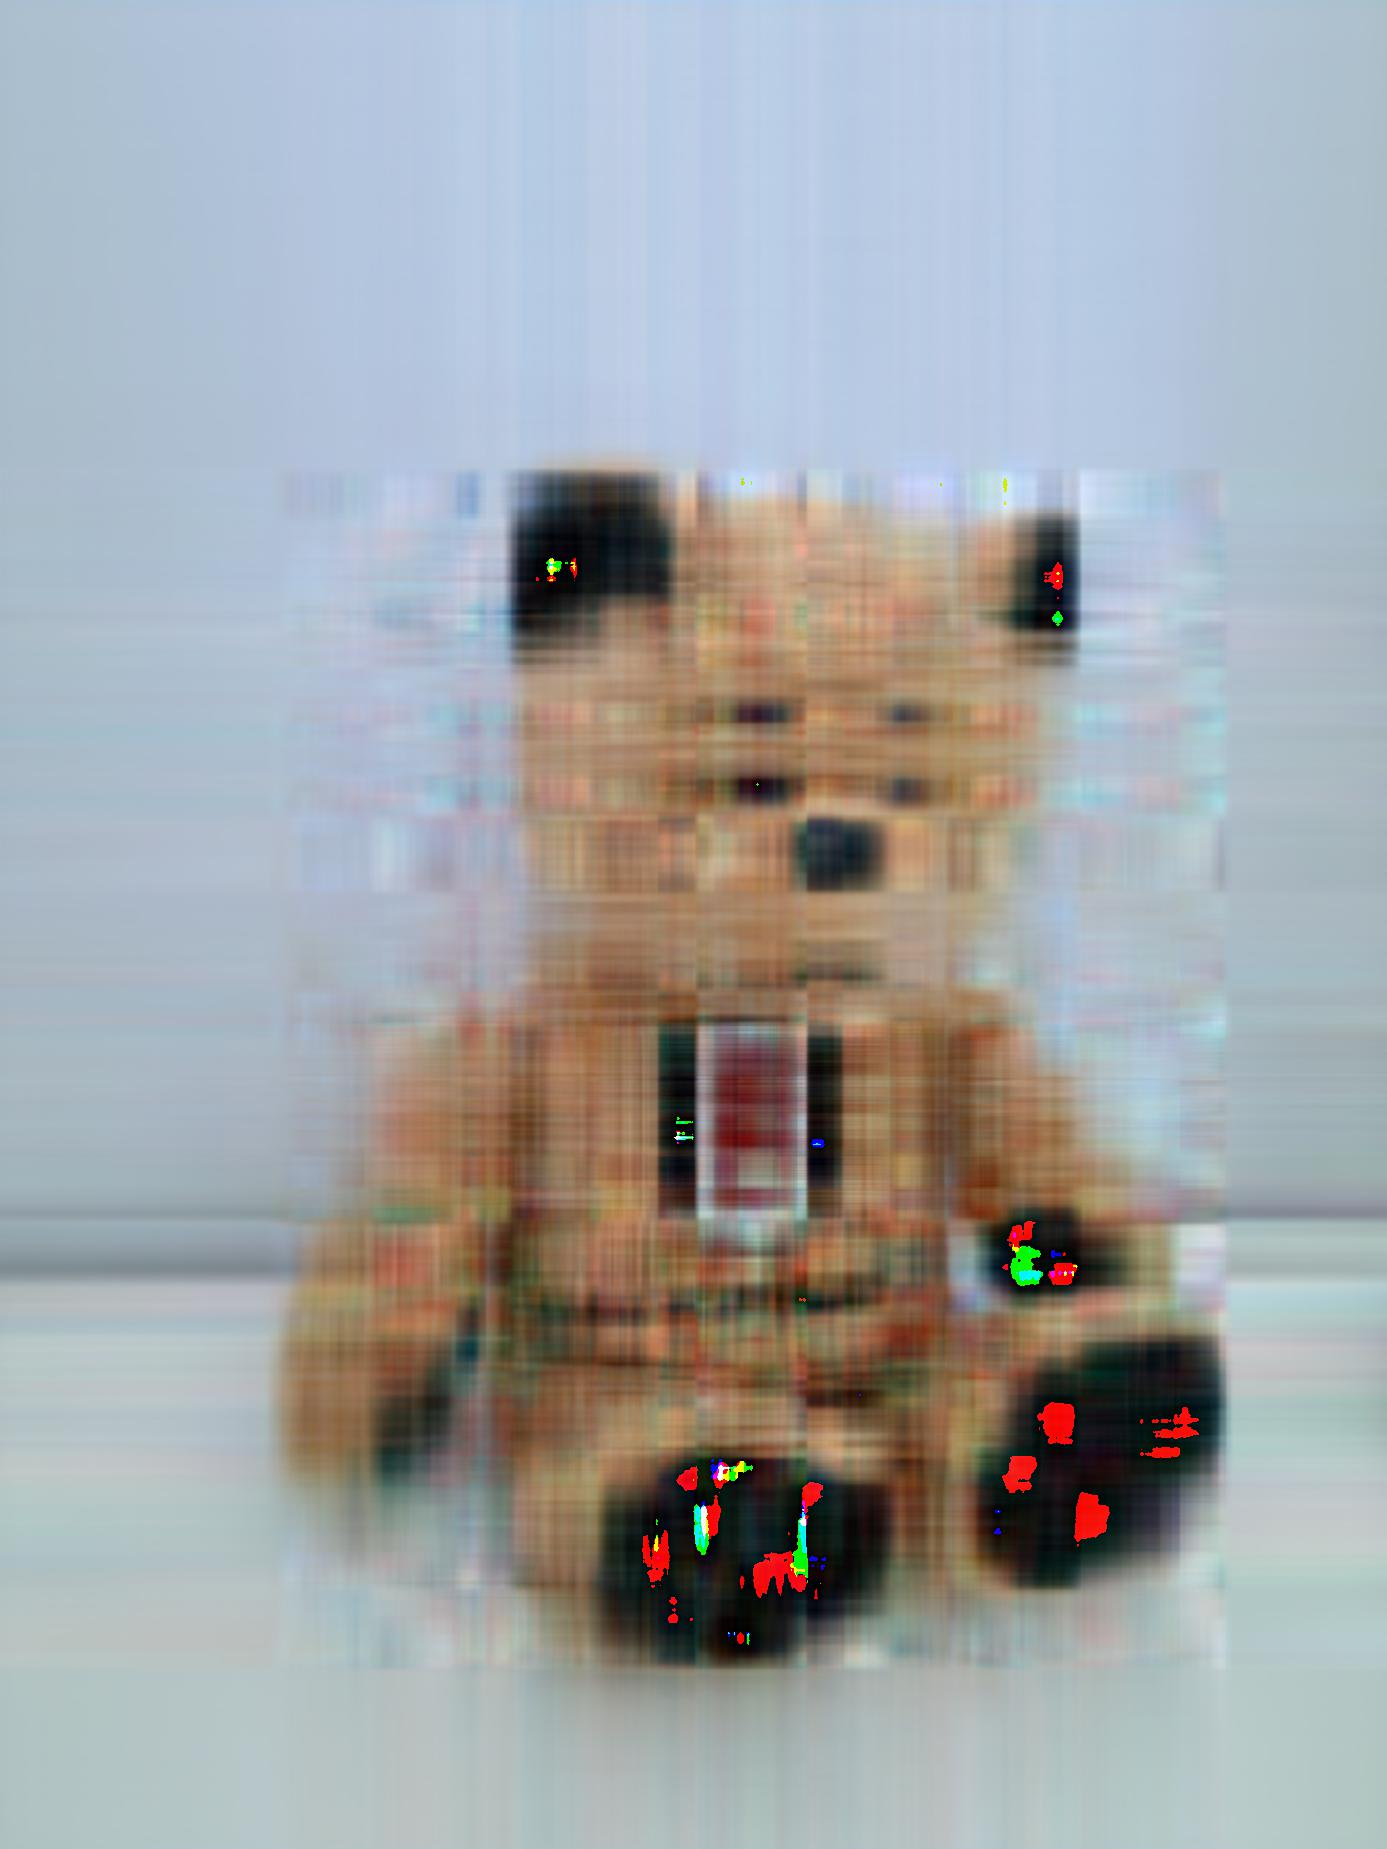

In [27]:
#display(PIL_image, width=30)
IPython.display.Image(filename='ffc_recon.jpg', width = 150) 
#im = np.matrix(img_all)

#im = Image.fromarray(img_all)

#plt.imshow(im)
#plt.imshow(img_all)

#im = Image.open("ffc_lores.jpg")
#im = np.asarray(img_all)
#im = Image.fromarray(a)
#plt.imshow(im)

In [28]:
img_all.shape

(1849, 1387, 3)

In [29]:
img_all = np.array([rec_imgr, rec_imgg, rec_imgb]).T
img_all = np.swapaxes(img_all,0,1)
PIL_image = Image.fromarray(np.uint8(img_all))
PIL_image.show(title = 'swapaxes')  # title doesn't work on mac

In [30]:
# This pops up an external window of the original photo
img.show()
img.size

(1387, 1849)

## The Dominant Modes

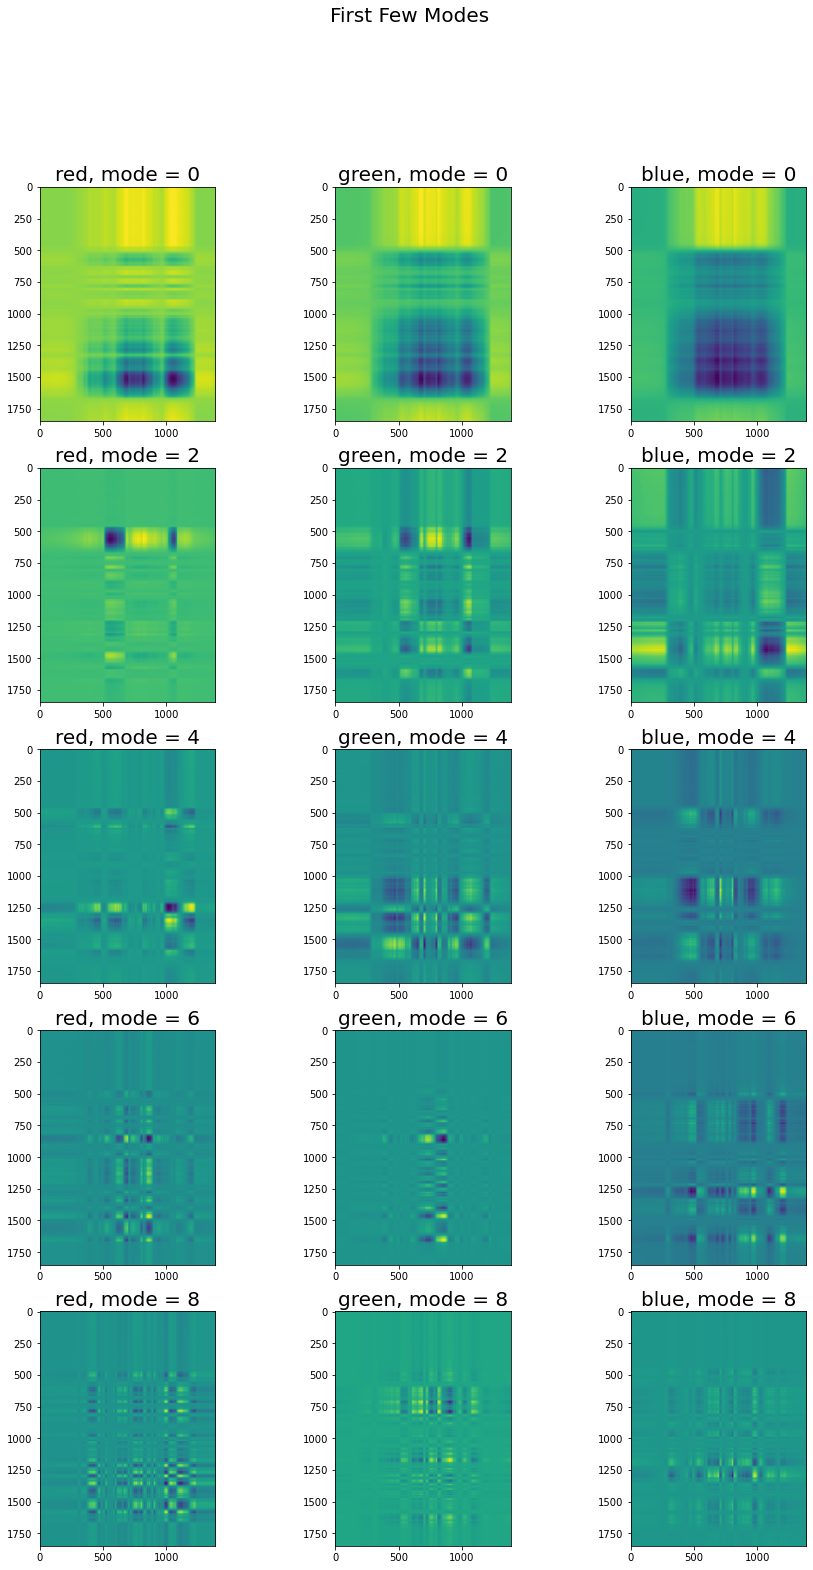

In [31]:
# cell toggle scrolling from menu to prevent small window and scroll bar
fontsize=20
fig=plt.figure(figsize=(15, 25))
fig.suptitle('First Few Modes', fontsize=fontsize)

c = 0; max_m = 5; step_m = 2
for m in range(0,max_m*step_m, step_m):
  n = m+1

  c += 1
  mode_imgr = np.matrix(Ur[:, m:n]) * np.diag(sr[m:n]) * np.matrix(Vr[m:n, :])
  mode_imgr = imgr_mat.std()*mode_imgr + imgr_mat.mean()
  axs=fig.add_subplot(max_m,3,c)
  axs.imshow(mode_imgr)
  axs.set_title('red, mode = '+str(m), fontsize=fontsize)


  c += 1
  mode_imgg = np.matrix(Ug[:, m:n]) * np.diag(sg[m:n]) * np.matrix(Vg[m:n, :])
  mode_imgg = imgg_mat.std()*mode_imgg + imgg_mat.mean()
  axs=fig.add_subplot(max_m,3,c)
  axs.imshow(mode_imgg)
  axs.set_title('green, mode = '+str(m), fontsize=fontsize)


  c += 1
  mode_imgb = np.matrix(Ub[:, m:n]) * np.diag(sb[m:n]) * np.matrix(Vb[m:n, :])
  mode_imgb = imgb_mat.std()*mode_imgb + imgb_mat.mean()
  axs=fig.add_subplot(max_m,3,c)
  axs.imshow(mode_imgb)

  axs.set_title('blue, mode = '+str(m), fontsize=fontsize)


Now again, but with them combined

Text(0.5, 1.0, 'blue, modes up to = 10')

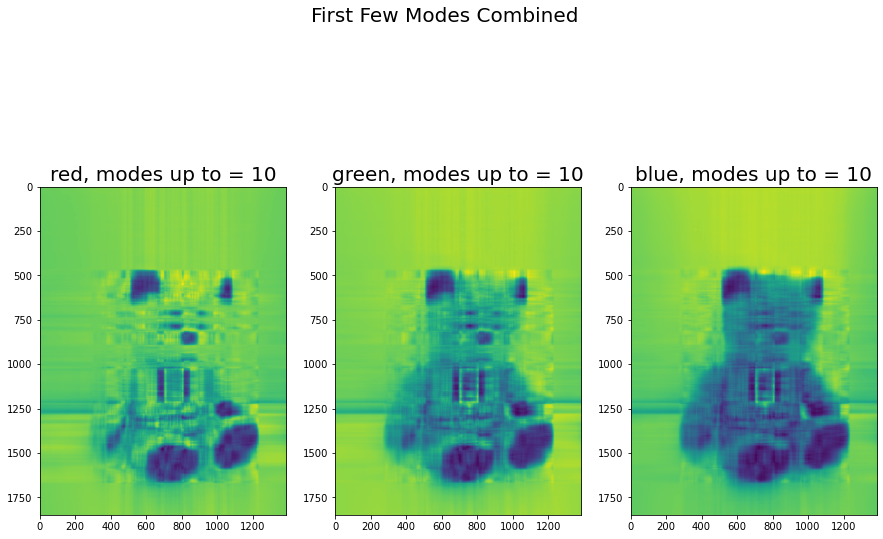

In [32]:
# cell toggle scrolling from menu to prevent small window and scroll bar
fontsize=20
fig=plt.figure(figsize=(15,10))
fig.suptitle('First Few Modes Combined', fontsize=fontsize)

m = 0
n = max_m*step_m
c = 1
mode_imgr = np.matrix(Ur[:, m:n]) * np.diag(sr[m:n]) * np.matrix(Vr[m:n, :])
mode_imgr = imgr_mat.std()*mode_imgr + imgr_mat.mean()
axs=fig.add_subplot(1,3,c)
axs.imshow(mode_imgr)
axs.set_title('red, modes up to = '+str(n), fontsize=fontsize)


c += 1
mode_imgg = np.matrix(Ug[:, m:n]) * np.diag(sg[m:n]) * np.matrix(Vg[m:n, :])
mode_imgg = imgg_mat.std()*mode_imgg + imgg_mat.mean()
axs=fig.add_subplot(1,3,c)
axs.imshow(mode_imgg)
axs.set_title('green, modes up to = '+str(n), fontsize=fontsize)


c += 1
mode_imgb = np.matrix(Ub[:, m:n]) * np.diag(sb[m:n]) * np.matrix(Vb[m:n, :])
mode_imgb = imgb_mat.std()*mode_imgb + imgb_mat.mean()
axs=fig.add_subplot(1,3,c)
axs.imshow(mode_imgb)
axs.set_title('blue, modes up to = '+str(n), fontsize=fontsize)



In [33]:
# unpack with *
print(*range(0,5,2))

0 2 4


In [34]:
print(Ur[:,0:1])

[[0.01086898]
 [0.01088622]
 [0.011258  ]
 ...
 [0.01013585]
 [0.01012687]
 [0.00998028]]


# Technical Notes

This originated from
<https://stackoverflow.com/questions/38540326/save-html-of-a-jupyter-notebook-from-within-the-notebook>

These lines create a back up of the notebook. They can be ignored.

At some point this is better as a bash script outside of the notebook

In [35]:
%%bash
NBROOTNAME='9_svd'
OUTPUTTING=1

if [ $OUTPUTTING -eq 1 ]; then
  jupyter nbconvert --to html $NBROOTNAME.ipynb
  cp $NBROOTNAME.html ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  mv -f $NBROOTNAME.html ./formats/html/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/pdf/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.py
  mv -f $NBROOTNAME.py ./formats/py/
else
  echo 'Not Generating html, pdf and py output versions'
fi

[NbConvertApp] Converting notebook 9_svd.ipynb to html
[NbConvertApp] Writing 2150472 bytes to 9_svd.html
[NbConvertApp] Converting notebook 9_svd.ipynb to pdf
[NbConvertApp] Support files will be in 9_svd_files/
[NbConvertApp] Making directory ./9_svd_files
[NbConvertApp] Making directory ./9_svd_files
[NbConvertApp] Making directory ./9_svd_files
[NbConvertApp] Making directory ./9_svd_files
[NbConvertApp] Making directory ./9_svd_files
[NbConvertApp] Making directory ./9_svd_files
[NbConvertApp] Making directory ./9_svd_files
[NbConvertApp] Making directory ./9_svd_files
[NbConvertApp] Making directory ./9_svd_files
[NbConvertApp] Making directory ./9_svd_files
[NbConvertApp] Making directory ./9_svd_files
[NbConvertApp] Making directory ./9_svd_files
[NbConvertApp] Making directory ./9_svd_files
[NbConvertApp] Writing 76544 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 